In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

import os
import subprocess

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('./tag_data/tag_data_calc.csv')

date_time = pd.to_datetime(df.pop('timestamp'))
df = df.drop(columns=['participant_id', 'scl_baseline'])
df = df.dropna()
# status = df.pop('status')

In [3]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [4]:
print(train_df)

     Unnamed: 0  window_id  status  mean_eda   min_eda   max_eda   std_eda  \
0             0          1       0  0.069520  0.017529  0.319503  0.023006   
1             1          2       0  0.081852  0.072617  0.089039  0.003037   
2             2          3       0  0.078270  0.072448  0.082911  0.001938   
3             3          4       0  0.083994  0.076642  0.091662  0.003572   
4             4          5       0  0.085689  0.077764  0.132739  0.006678   
..          ...        ...     ...       ...       ...       ...       ...   
871         871        872       0  0.077932  0.069757  0.108464  0.002783   
872         872        873       0  0.077635  0.073221  0.101747  0.003690   
873         873        874       0  0.079824  0.073754  0.093136  0.002425   
874         874        875       0  0.080051  0.075885  0.083865  0.001204   
875         875        876       0  0.078726  0.072856  0.084020  0.001410   

     mean_scr   min_scr   max_scr  ...   min_bvp   max_bvp   st

In [5]:
print(train_df.min())

Unnamed: 0           0.000000e+00
window_id            1.000000e+00
status               0.000000e+00
mean_eda             2.154311e-02
min_eda             -8.822856e-02
max_eda              2.525725e-02
std_eda              6.868508e-04
mean_scr            -7.481722e-03
min_scr             -5.806008e-01
max_scr              1.548057e-03
num_scr_peaks        0.000000e+00
max_scr_amplitude    0.000000e+00
mean_scl             2.153695e-02
min_scl              7.994853e-03
max_scl              2.297117e-02
mean_diff_scl       -5.455306e-02
index                0.000000e+00
mean_temp            2.675599e+01
max_temp             2.738281e+01
min_temp             2.450781e+01
std_temp             7.274217e-03
mean_bvp            -6.487486e-04
min_bvp             -2.360390e+01
max_bvp              3.213395e-02
std_bvp              9.641576e-03
hrv_mean_hr          4.615422e+01
hrv_min_hr           2.204363e+00
hrv_max_hr           8.727273e+01
hrv_std_hr           9.512355e+00
hrv_mean_nni  

In [6]:
print(train_df.max())

Unnamed: 0           8.750000e+02
window_id            8.760000e+02
status               1.000000e+00
mean_eda             8.192307e-01
min_eda              7.113062e-01
max_eda              1.580504e+00
std_eda              2.967091e-01
mean_scr             1.473610e-02
min_scr             -1.453690e-03
max_scr              8.850689e-01
num_scr_peaks        6.000000e+00
max_scr_amplitude    1.187360e+00
mean_scl             8.190327e-01
min_scl              7.041900e-01
max_scl              9.368726e-01
mean_diff_scl        7.429427e-01
index                8.750000e+02
mean_temp            3.370605e+01
max_temp             3.373438e+01
min_temp             3.367188e+01
std_temp             2.053791e+00
mean_bvp             7.613810e-04
min_bvp             -3.080216e-02
max_bvp              2.303572e+01
std_bvp              3.149137e+00
hrv_mean_hr          1.271138e+02
hrv_min_hr           3.657143e+01
hrv_max_hr           5.485714e+02
hrv_std_hr           7.223366e+01
hrv_mean_nni  

In [7]:
train_min = train_df.min()
train_max = train_df.max()

train_df = (train_df - train_min) / (train_max - train_min)
val_df = (val_df - train_min) / (train_max - train_min)
test_df = (test_df - train_min) / (train_max - train_min)

df_std = (df - train_min) / (train_max - train_min)
df_test1 = (df - train_min) / (train_max - train_min)
df_std = train_df.melt(var_name='Column', value_name='Normalized')

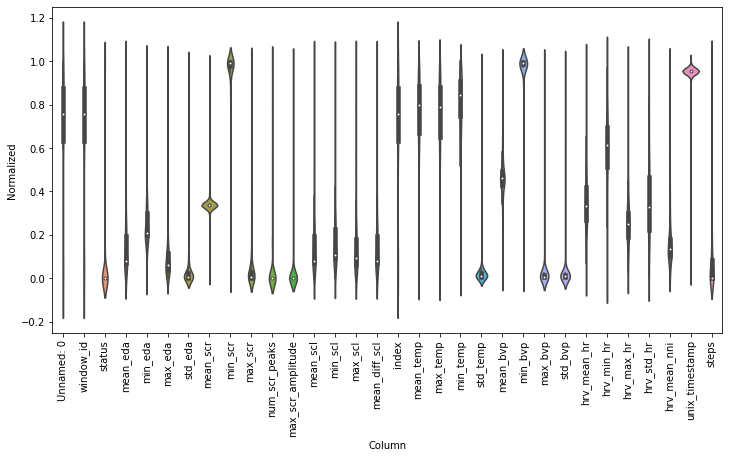

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [9]:
df_test1.describe()

,Unnamed: 0,window_id,status,mean_eda,min_eda,max_eda,std_eda,mean_scr,min_scr,max_scr,...,min_bvp,max_bvp,std_bvp,hrv_mean_hr,hrv_min_hr,hrv_max_hr,hrv_std_hr,hrv_mean_nni,unix_timestamp,steps
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,...,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.796754,0.562979,0.027642,0.125098,0.236607,0.081903,0.022421,0.338279,0.969009,0.029671,...,0.974181,0.023401,0.021076,0.343386,0.589447,0.251860,0.338747,0.154006,0.948226,0.078328
std,0.330211,0.379165,0.164079,0.139106,0.108790,0.104466,0.063048,0.047840,0.092103,0.092247,...,0.099264,0.090440,0.077112,0.128431,0.187851,0.111738,0.172748,0.093118,0.070137,0.161383
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000289,0.000000,-0.303275,0.000000,-0.008352,...,0.000000,0.000000,-0.000258,0.000000,0.000000,0.000000,0.000000,-0.060441,-0.090899,0.000000
25%,0.685143,0.087429,0.000000,0.063052,0.189685,0.033414,0.002109,0.336290,0.984270,0.001390,...,0.987232,0.004735,0.005433,0.268477,0.519334,0.189189,0.211777,0.103247,0.954705,0.000000
50%,0.860571,0.705143,0.000000,0.075300,0.204544,0.044158,0.004968,0.336793,0.995355,0.003820,...,0.992363,0.006963,0.008235,0.327387,0.613039,0.248933,0.311691,0.135615,0.954716,0.000000
75%,1.036000,0.880571,0.000000,0.141107,0.256805,0.098481,0.014478,0.337297,0.998044,0.019258,...,0.995107,0.011745,0.013075,0.396535,0.695960,0.300477,0.456144,0.180299,0.954728,0.074286
max,1.211429,1.056000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.082260,1.298479,1.000000,1.000000,1.000000,1.000349,1.000000


In [10]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels
  
  def plot(self, model=None, plot_col='status', max_subplots=6):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
  
  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
  
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [11]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['status'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['status']

In [12]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 32)
Labels shape (batch, time, features): (32, 1, 1)


In [13]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [14]:
baseline = Baseline(label_index=column_indices['status'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=1, return_dict=True)

2/2 [==============================] - 0s 4ms/step - loss: 0.0984 - mean_absolute_error: 0.0984


In [15]:
wide_window = WindowGenerator(
    input_width=60, label_width=60, shift=1,
    label_columns=['status'])

wide_window

Total window size: 61
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
Label column name(s): ['status']

In [16]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 60, 32)
Output shape: (32, 60, 1)


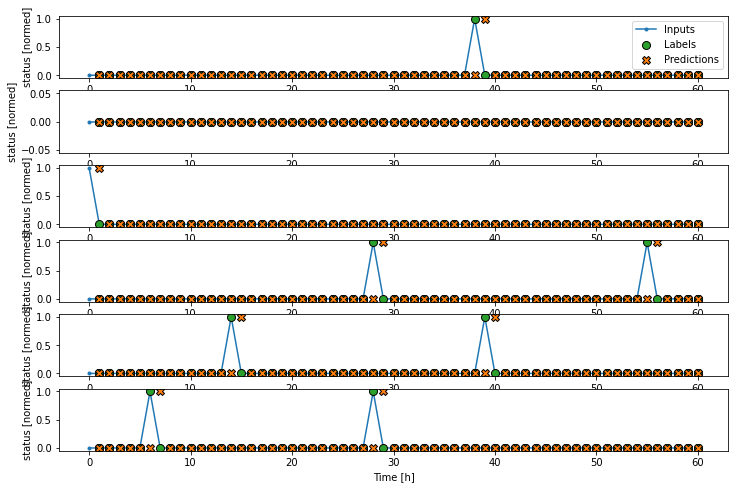

In [17]:
wide_window.plot(baseline)

In [18]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [19]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 32)
Output shape: (32, 1, 1)


In [20]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [21]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
14/14 [==============================] - 1s 12ms/step - loss: 0.2265 - mean_absolute_error: 0.3959 - val_loss: 0.0643 - val_mean_absolute_error: 0.1507
Epoch 2/20
14/14 [==============================] - 0s 5ms/step - loss: 0.1269 - mean_absolute_error: 0.2521 - val_loss: 0.0495 - val_mean_absolute_error: 0.1251
Epoch 3/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0833 - mean_absolute_error: 0.1810 - val_loss: 0.0622 - val_mean_absolute_error: 0.1841
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.0739 - mean_absolute_error: 0.2202


In [22]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 60, 32)
Output shape: (32, 60, 1)


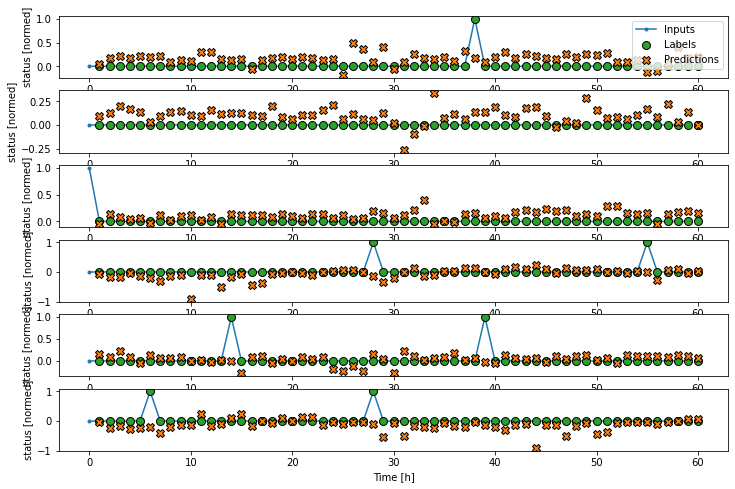

In [23]:
wide_window.plot(linear)

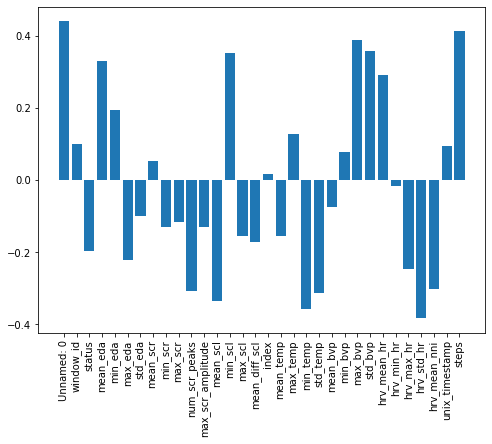

In [24]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [25]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [26]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 60, 32)
Output shape: (32, 60, 1)


In [27]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [28]:
print(wide_window.train)

<_MapDataset element_spec=(TensorSpec(shape=(None, 60, 32), dtype=tf.float32, name=None), TensorSpec(shape=(None, 60, 1), dtype=tf.float32, name=None))>


In [29]:
history = compile_and_fit(lstm_model, wide_window)

# IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

Epoch 1/20
12/12 [==============================] - 3s 55ms/step - loss: 0.1510 - mean_absolute_error: 0.2992 - val_loss: 0.0599 - val_mean_absolute_error: 0.1929
Epoch 2/20
12/12 [==============================] - 0s 18ms/step - loss: 0.0492 - mean_absolute_error: 0.1616 - val_loss: 0.0482 - val_mean_absolute_error: 0.0974
Epoch 3/20
12/12 [==============================] - 0s 20ms/step - loss: 0.0316 - mean_absolute_error: 0.0800 - val_loss: 0.0464 - val_mean_absolute_error: 0.0880
Epoch 4/20
12/12 [==============================] - 0s 24ms/step - loss: 0.0266 - mean_absolute_error: 0.0694 - val_loss: 0.0397 - val_mean_absolute_error: 0.0650
Epoch 5/20
12/12 [==============================] - 0s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0703 - val_loss: 0.0418 - val_mean_absolute_error: 0.0597
Epoch 6/20
2/2 [==============================] - 0s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0558


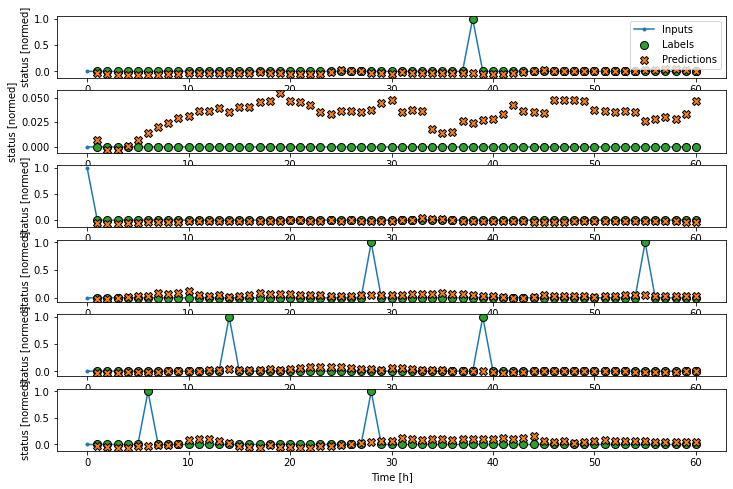

In [30]:
wide_window.plot(lstm_model)

In [31]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    lstm_model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /var/folders/4l/bm2wscc108v7sqdvdqrv5m2c0000gn/T/1

INFO:tensorflow:Assets written to: /var/folders/4l/bm2wscc108v7sqdvdqrv5m2c0000gn/T/1/assets


INFO:tensorflow:Assets written to: /var/folders/4l/bm2wscc108v7sqdvdqrv5m2c0000gn/T/1/assets



Saved model:
total 1304
drwxr-xr-x  2 maliaedmonds  staff      64 Jan 21 08:54 assets
-rw-r--r--  1 maliaedmonds  staff      56 Jan 21 08:54 fingerprint.pb
-rw-r--r--  1 maliaedmonds  staff    8989 Jan 21 08:54 keras_metadata.pb
-rw-r--r--  1 maliaedmonds  staff  648326 Jan 21 08:54 saved_model.pb
drwxr-xr-x  4 maliaedmonds  staff     128 Jan 21 08:54 variables


In [11]:
import os

folder_path = ""
print(os.path.isdir(folder_path))

False


In [10]:
print(not folder_path)

False
